# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Sipa02/BMLP_submission/main/df_all_features.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AmountToBalanceRatio,AmountPerLogin,TransactionHour,TimeOfDay,KMeans_Cluster,Potential_Fraud
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,81,1,5112.21,2024-11-04 08:08:08,0.002756,14.09,16,2,0,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,141,1,13758.91,2024-11-04 08:09:35,0.027345,376.24,16,2,0,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,56,1,1122.35,2024-11-04 08:07:04,0.112523,126.29,18,2,0,False
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,25,1,8569.06,2024-11-04 08:09:06,0.021531,184.50,16,2,0,False
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,198,1,7429.40,2024-11-04 08:06:39,0.001810,13.45,17,2,0,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID', 'MerchantID', 'Channel', 'CustomerOccupation', 'IP Address', 'Potential_Fraud']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AmountToBalanceRatio,AmountPerLogin,TransactionHour,TimeOfDay,KMeans_Cluster,Potential_Fraud
0,0,126,14.09,2023-04-11 16:29:14,1,36,365,186,14,0,...,81,1,5112.21,2024-11-04 08:08:08,0.002756,14.09,16,2,0,0
1,1,450,376.24,2023-06-27 16:44:19,1,15,50,82,51,0,...,141,1,13758.91,2024-11-04 08:09:35,0.027345,376.24,16,2,0,0
2,2,18,126.29,2023-07-10 18:16:08,1,23,229,343,8,2,...,56,1,1122.35,2024-11-04 08:07:04,0.112523,126.29,18,2,0,0
3,3,68,184.50,2023-05-05 16:32:11,1,33,182,300,1,2,...,25,1,8569.06,2024-11-04 08:09:06,0.021531,184.50,16,2,0,0
4,4,406,13.45,2023-10-16 17:51:24,0,1,298,501,90,2,...,198,1,7429.40,2024-11-04 08:06:39,0.001810,13.45,17,2,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Konversi kolom ke tipe datetime terlebih dahulu
for col in ['TransactionDate', 'PreviousTransactionDate']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [6]:
# Setelah itu, ekstrak komponen datetime
for col in ['TransactionDate', 'PreviousTransactionDate']:
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_minute'] = df[col].dt.minute
    df[col + '_second'] = df[col].dt.second

# Drop kolom datetime asli
df = df.drop(columns=['TransactionDate', 'PreviousTransactionDate'])

In [7]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Potential_Fraud', 'KMeans_Cluster'])
y = df['KMeans_Cluster']

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  2512
Jumlah data latih:  2009
Jumlah data test:  503


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

In [8]:
# Apply RobustScaler on the numeric features only:
scaler = RobustScaler()
numeric_columns = X.select_dtypes(include=['number']).columns
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])


In [9]:
rf = RandomForestClassifier().fit(x_train, y_train)

RandomForestClassifier merupakan ensemble learning yang menggabungkan banyak decision tree untuk menghasilkan prediksi yang robust. Random Forest sangat efektif dalam menangani dataset dengan fitur yang kompleks dan non-linear, serta relatif tahan terhadap overfitting. Dengan cara mengacak subset data dan fitur pada setiap pohon, model ini juga memberikan stabilitas dan generalisasi yang baik ketika diterapkan pada data testing. Selain itu, Random Forest memberikan interpretasi penting mengenai fitur-fitur mana yang paling berkontribusi terhadap prediksi, sehingga sangat berguna dalam konteks deteksi fraud.

In [10]:
svm = SVC().fit(x_train, y_train)

Support Vector Machine (SVM) mampu menemukan hyperplane optimal yang memaksimalkan margin antara kelas-kelas yang berbeda. Model ini sangat efektif untuk data dengan dimensi tinggi dan memiliki performa yang baik ketika terdapat batasan yang jelas antara kelas-kelas, seperti antara transaksi normal dan fraud. SVM juga cukup handal dalam mengurangi generalisasi error, yang membuatnya ideal untuk mendeteksi pola-pola anomali dalam fraud detection, terutama jika dilakukan tuning parameter yang tepat.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [11]:
# Fungsi untuk mengevaluasi model dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    }
    return results

# Evaluasi setiap model pada data training dan testing
results = {
    'Random Forest (RF)': {
        'Training': evaluate_model(rf, x_train, y_train),
        'Testing': evaluate_model(rf, x_test, y_test)
    },
    'Support Vector Machine (SVM)': {
        'Training': evaluate_model(svm, x_train, y_train),
        'Testing': evaluate_model(svm, x_test, y_test)
    }
}

# Buat DataFrame untuk merangkum hasil evaluasi
rows = []
for model_name, dataset_results in results.items():
    for dataset_type, metrics in dataset_results.items():
        rows.append({
            'Model': model_name,
            'Dataset': dataset_type,
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1-Score': metrics['F1-Score']
        })

summary_df = pd.DataFrame(rows)
print(summary_df)


                          Model   Dataset  Accuracy  Precision  Recall  \
0            Random Forest (RF)  Training  1.000000        1.0    1.00   
1            Random Forest (RF)   Testing  1.000000        1.0    1.00   
2  Support Vector Machine (SVM)  Training  1.000000        1.0    1.00   
3  Support Vector Machine (SVM)   Testing  0.998012        1.0    0.95   

   F1-Score  
0  1.000000  
1  1.000000  
2  1.000000  
3  0.974359  


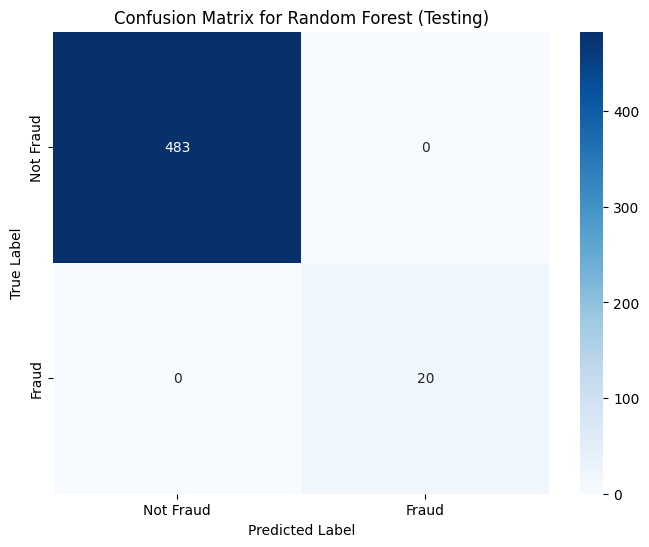

In [12]:
# confusion matrix testing model random forest
y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest (Testing)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

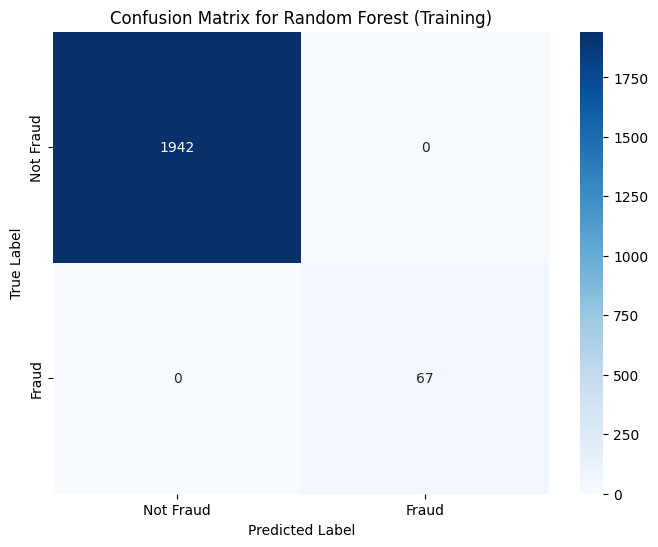

In [13]:
# confusion matrix training model random forest
y_pred_rf_train = rf.predict(x_train) # Prediksi untuk data training
cm_rf_train = confusion_matrix(y_train, y_pred_rf_train) # Confusion matrix training

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest (Training)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

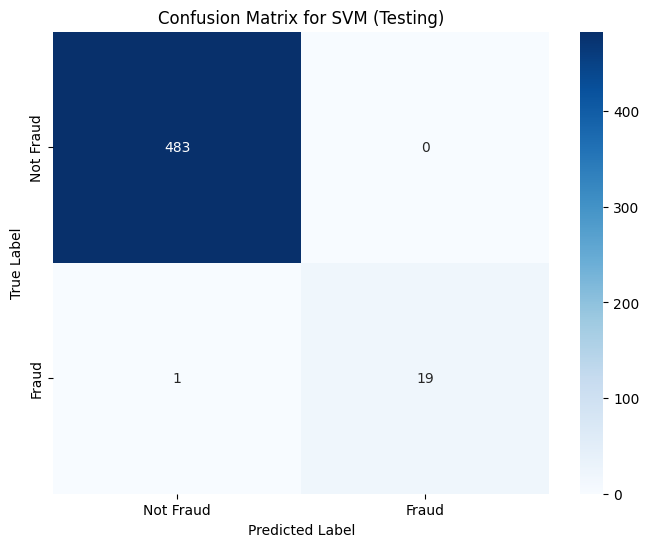

In [14]:
# confusion matrix testing model svm
y_pred_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for SVM (Testing)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

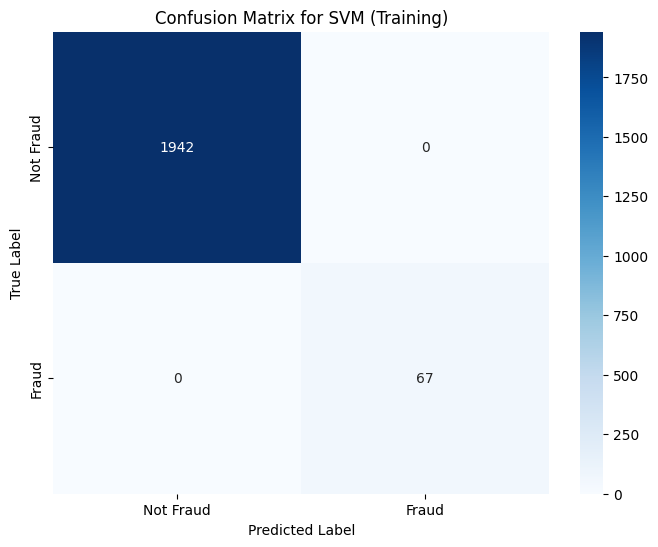

In [15]:
# confusion matrix training model svm
y_pred_svm_train = svm.predict(x_train)
cm_svm_train = confusion_matrix(y_train, y_pred_svm_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for SVM (Training)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Kesimpulan Perbandingan:

- RF menunjukkan performa yang optimal dengan akurasi, precision, recall, dan F1-Score masing-masing 100%. Artinya, model ini mampu mendeteksi fraud secara sempurna tanpa menghasilkan false positive ataupun false negative.

- SVM juga memiliki precision 100%, namun recall-nya sedikit lebih rendah, yaitu 95%. Hal ini menunjukkan bahwa meskipun hampir sempurna, ada beberapa kasus fraud yang mungkin terlewat. F1-Score SVM yang mencapai 97.44% mengindikasikan keseimbangan yang sangat baik antara precision dan recall.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Identifikasi Kelemahan Model:**

- Random Forest (RF):
  - Performa yang sempurna pada data training dan testing sangat mengesankan, namun juga mengundang kecurigaan potensi overfitting. Perlu dilakukan validasi lebih lanjut untuk memastikan bahwa model ini benar-benar generalizable.

- Support Vector Machine (SVM):
  - Penurunan recall pada data testing (95%) menunjukkan bahwa SVM mungkin tidak menangkap semua kasus fraud. Meskipun precision tetap 100%, ada beberapa kasus fraud yang tidak terdeteksi, yang bisa berdampak signifikan tergantung konteks aplikasinya.

- Secara umum, meskipun performa keduanya sangat tinggi, perbedaan antara hasil training dan testing pada SVM mengisyaratkan adanya risiko overfitting.


**Rekomendasi Tindakan Lanjutan:**

- Jika data fraud masih terbatas, mengumpulkan lebih banyak data (atau menggunakan teknik oversampling seperti SMOTE) dapat membantu model untuk belajar lebih baik.

- Selain RF dan SVM, pertimbangkan algoritma lain seperti XGBoost, LightGBM, atau ensemble methods yang dapat memberikan hasil lebih stabil.

- Gunakan cross-validation untuk memastikan bahwa model tidak overfitting dan performa yang didapat dapat digeneralisasikan dengan baik ke data baru.

- Tinjau kembali fitur-fitur yang digunakan dan pertimbangkan untuk menambahkan fitur baru atau melakukan seleksi fitur agar model hanya bekerja dengan variabel yang paling relevan.



